# 군집화 알고리즘


https://scikit-learn.org/1.5/modules/clustering.html




![](https://scikit-learn.org/1.5/_images/sphx_glr_plot_cluster_comparison_001.png)




군집화는 머신러닝에서 데이터 포인트들을 유사한 특성을 가진 그룹으로 묶는 기법이다.


군집화는 지도학습과 달리 비지도학습(unsupervised learning)의 일종으로, 사전에 정의된 라벨 없이 데이터를 분석한다. 즉, 데이터의 내재된 구조를 파악하여 서로 유사한 데이터들을 군집(cluster)으로 묶어주는 역할을 한다.


**주요 군집화 알고리즘**
- **K-Means**: 데이터를 K개의 클러스터로 나누는 알고리즘이다. 이 알고리즘은 각 클러스터의 중심(센트로이드)까지의 거리를 최소화하는 것을 목표로 한다.
- **DBScan**: 밀도 기반의 군집화 알고리즘으로, 밀도가 높은 영역을 클러스터로 식별하며, 밀도가 낮은 데이터 포인트는 노이즈로 간주한다. 이를 통해 클러스터의 모양에 제약 없이 다양한 형태의 군집을 탐지할 수 있다.
- **Mean-Shift**: 데이터의 밀도가 높은 지역으로 이동하면서 클러스터를 형성하는 알고리즘이다. 이 알고리즘은 클러스터의 개수를 미리 지정할 필요가 없다는 점이 특징이다.
- **Gaussian Mixture Model (GMM)**: 데이터를 여러 개의 가우시안 분포의 조합으로 모델링하여 클러스터링을 수행하는 알고리즘이다. 각 클러스터에 속할 확률을 계산하여 데이터를 분류한다.


**군집화의 적용 분야**
- **고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)**: 군집화 기법을 활용해 고객의 특성에 따라 그룹을 나누고, 마켓 및 브랜드 전략을 세우는 데 활용한다.


- **이미지 검출 및 트래킹(Image Segmentation and Tracking)**: 이미지 데이터에서 특정 객체를 검출하고 분할하거나 추적하는 데 사용된다.


- **이상 탐지(Anomaly Detection)**: 정상적인 데이터와 다른 이상 데이터를 탐지하는 데 활용한다.


# k-평균
K-Means는 비지도 학습의 군집화 기법으로, 데이터 포인트를 K개의 군집으로 묶는 데 사용된다.


각 군집은 유사한 데이터 포인트를 하나로 묶기 위해 **중심점(centroid)** 을 계산한다.


![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif?20170530143526)


**작동단계**
1. K개의 중심점을 임의로 선택한다.
2. 각 데이터 포인트를 가장 가까운 중심점에 할당하여 군집을 형성한다.
3. 각 군집의 데이터 포인트를 기반으로 새로운 중심점을 계산한다.
4. 2~3단계를 반복하여, __중심점의 변화가 거의 없을 때까지 실행한다.__
5. 최종적으로 모든 데이터가 가장 가까운 중심점에 할당되며, 모든 중심점은 최적의 위치에 놓이게 된다.


**특징**
- 장점: 간단한 개념과 구현, 빠른 계산 속도
- 단점: K 값을 미리 정해야 함, 군집이 원형 구조가 아닐 경우 성능 저하 가능성


**장점**
- **일반적인 군집화에서 가장 많이 활용되는 알고리즘**
- **알고리즘이 쉽고 간결**
- **대용량 데이터에도 활용** 가능


**단점**
- **거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어질 수 있다**(이를 위해 PCA로 차원 축소를 적용해야 할 수도 있다).
- **반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 느려진다**.
- **이상치(Outlier) 데이터에 취약**하다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 붓꽃
X, y = load_iris(return_X_y=True, as_frame=True)

# 군집 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=42)
kmeans.fit_transform(X)

array([[5.03132789, 0.14135063, 3.41251117],
       [5.08750645, 0.44763825, 3.38963991],
       [5.25229169, 0.4171091 , 3.56011415],
       [5.12704282, 0.52533799, 3.412319  ],
       [5.07638109, 0.18862662, 3.4603117 ],
       [4.6529179 , 0.67703767, 3.14251434],
       [5.18485505, 0.4151867 , 3.50715704],
       [4.97466956, 0.06618157, 3.32903073],
       [5.3020706 , 0.80745278, 3.56110404],
       [5.04034023, 0.37627118, 3.34972272],
       [4.86909709, 0.4824728 , 3.31978466],
       [4.96948678, 0.25373214, 3.30275389],
       [5.1637448 , 0.50077939, 3.45734945],
       [5.62559662, 0.91322505, 3.89486669],
       [5.07819914, 1.01409073, 3.64453145],
       [4.85660046, 1.20481534, 3.49280098],
       [5.00219478, 0.6542018 , 3.49087612],
       [4.99534695, 0.1441527 , 3.37762449],
       [4.58840834, 0.82436642, 3.10971292],
       [4.94411371, 0.38933276, 3.37135761],
       [4.66670189, 0.46344363, 3.06922637],
       [4.89580185, 0.3286031 , 3.30868004],
       [5.

In [4]:
# 군집 결과
X['cluster'] = kmeans.labels_
X['target'] = y
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


In [6]:
# 시각화 준비
from sklearn.decomposition import PCA
X[['pca1', 'pca2']] = PCA(n_components=2).fit_transform(X.iloc[:,:4]) # 기존 4개의 특성만 고려
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca1,pca2
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,0,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,0,2,1.900942,0.116628


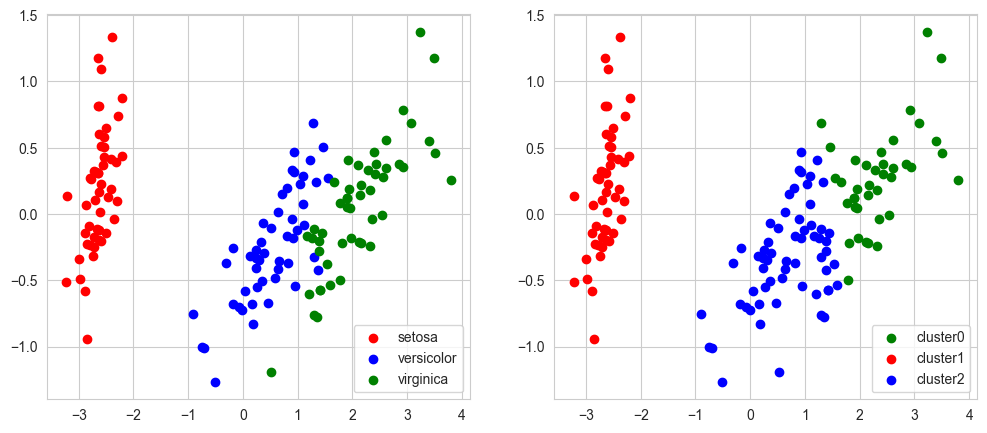

In [14]:
# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 1. target 기준
ax1.scatter(X[X['target'] == 0]['pca1'], X[X['target'] == 0]['pca2'], label='setosa', c='r')
ax1.scatter(X[X['target'] == 1]['pca1'], X[X['target'] == 1]['pca2'], label='versicolor', c='b')
ax1.scatter(X[X['target'] == 2]['pca1'], X[X['target'] == 2]['pca2'], label='virginica', c='g')
ax1.legend()

# 2. cluster 기준
ax2.scatter(X[X['cluster'] == 0]['pca1'], X[X['cluster'] == 0]['pca2'], label='cluster0', c='g')
ax2.scatter(X[X['cluster'] == 1]['pca1'], X[X['cluster'] == 1]['pca2'], label='cluster1', c='r')
ax2.scatter(X[X['cluster'] == 2]['pca1'], X[X['cluster'] == 2]['pca2'], label='cluster2', c='b')
ax2.legend()

plt.show()

In [12]:
# groupby
X.groupby(['target', 'cluster'])['cluster'].count()

target  cluster
0       1          50
1       0           3
        2          47
2       0          36
        2          14
Name: cluster, dtype: int64

In [13]:
# 새로운 데이터에 대한 군집 예측
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 최적의 k 찾기
- elbow method
- silhouette score

#### Elbow Method
클러스터 개수가 늘어날수록 각 클러스터 내부의 거리합(Inertia, SSE(오차 제곱합))은 작아진다.
하지만 어느 순간부터 급격한 감소가 완만해지는 지점이 있다.
그 지점을 **"팔꿈치(Elbow)"** 라고 부르며, 이 지점의 k가 적절하다.


절차:
1. k를 1부터 N까지 변화시키며 KMeans 모델을 학습.
2. 각 k에 대한 SSE (Within-cluster Sum of Squares)를 계산.
3. k vs SSE 그래프를 그려서 꺾이는 지점을 찾는다.

In [15]:
inertia = []

for k in range(2, 7):
    kmean = KMeans(n_clusters=k, random_state=42, max_iter=100)
    kmean.fit(X)
    inertia.append(kmean.inertia_)

inertia

[412.7157020793793,
 156.23172386311091,
 147.39643900125472,
 125.56399355879361,
 86.38990590284925]

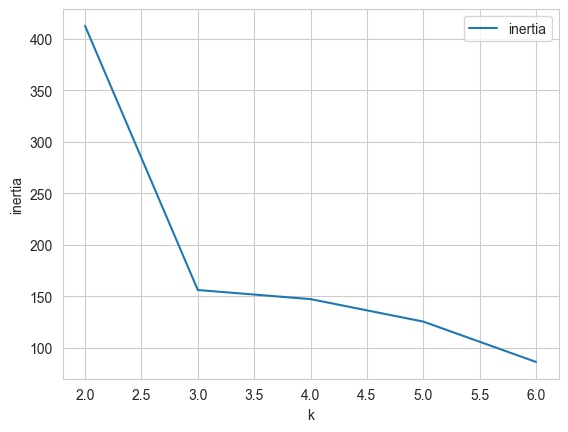

In [16]:
plt.plot(range(2, 7), inertia, label='inertia')
plt.legend()
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

#### Silhouette Score
클러스터 간의 분리도와 클러스터 내부의 응집도를 동시에 평가한 값.
값이 클수록 클러스터링 품질이 좋다는 뜻. 일반적으로 값이 가장 큰 k가 최적이다.


- 실루엣 점수 범위: -1 ~ 1
- 1에 가까울수록 군집이 잘 형성된 것
- 0에 가까우면 군집이 모호함
- 음수는 잘못된 군집화


$$ s(i) = \frac{b(i)−a(i)}{max(a(i),b(i))} $$


- a(i)는 데이터 포인트 i가 속한 클러스터 내의 평균 거리(클러스터 응집력).
- b(i)는 데이터 포인트 i가 다른 가장 가까운 클러스터와의 평균 거리(클러스터 분리도).
이 때, 전체 데이터에 대한 실루엣 점수는 모든 데이터 포인트의 실루엣 점수의 평균으로 계산된다.




**장점**
- 군집의 품질을 직관적으로 평가할 수 있으며, 개별 데이터 포인트 수준에서의 평가가 가능하다.
- 다양한 군집화 알고리즘에 적용 가능하다.

**단점**
 - 실루엣 점수가 높은 것이 항상 좋은 군집을 의미하는 것은 아니다. 군집의 수와 데이터의 구조에 따라 해석에 주의가 필요하다.


In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

K = range(2, 11)

for k in K:
    kmean = KMeans(n_clusters=k, random_state=42, max_iter=100)
    kmean.fit(X)
    # silhoustte_score(데이터, 라벨) -> silhoustte평균 점수 계산
    score = silhouette_score(X, kmean.labels_)
    silhouette_scores.append(score)

silhouette_scores

[0.6599897295193595,
 0.6531716151050327,
 0.5522754453227691,
 0.5723025127865197,
 0.5417107532046206,
 0.5141622621408962,
 0.5173664749915343,
 0.39951766303275793,
 0.3473158038483558]

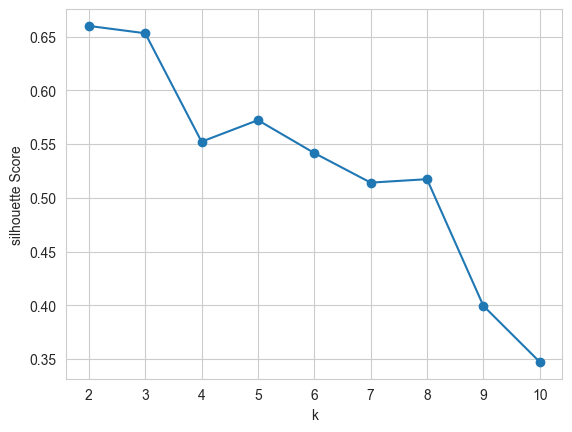

In [25]:
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('silhouette Score')
plt.show()

In [28]:
# 데이터포인트 실루엣 계수 확인
from sklearn.metrics import silhouette_samples # 전체 평균 점수(군집이 잘 나눠졌나)

X['silhouette_coef'] = silhouette_samples(X, X['cluster'])
# 경계값을 가지고 있는 애덜이 0에 가깝게 가지고 있음?
X['silhouette_coef'].describe()

count    150.000000
mean       0.652147
std        0.153265
min        0.235480
25%        0.553036
50%        0.662610
75%        0.800532
max        0.867812
Name: silhouette_coef, dtype: float64

<Axes: >

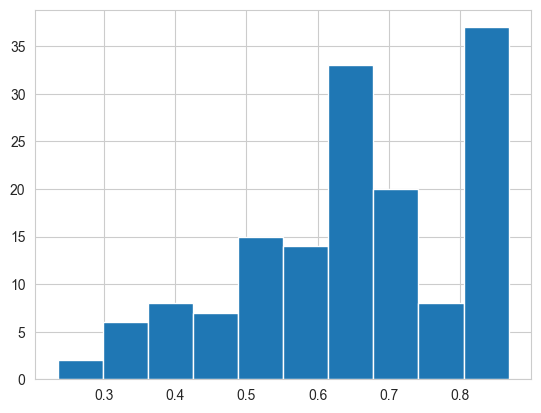

In [29]:
X['silhouette_coef'].hist()